In [23]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

### Convolutional Neural Network Architecture

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 256)       2560      
_________________________________________________________________
activation_10 (Activation)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       295040    
_________________________________________________________________
activation_11 (Activation)   (None, 22, 22, 128)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15488)            

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

### Training the CNN for 10 epochs using train data 

In [8]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10)

702/702 [==============================] - 356s 496ms/step - loss: 0.6672 - accuracy: 0.5789 - val_loss: 0.5640 - val_accuracy: 0.7014


### Visualizing the loss and the accuracy of trained CNN

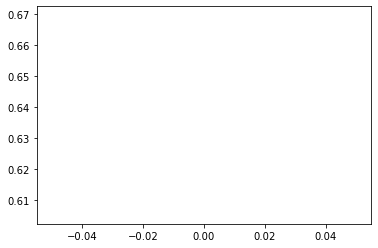

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

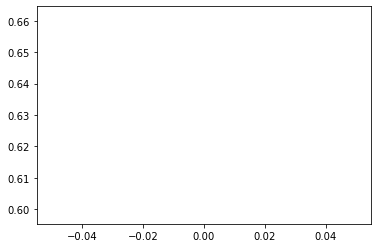

In [13]:
plt.plot(history.history['accuracy'])
#if not working replace 'accuracy' with 'acc'

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [16]:
print(model.evaluate(test_data,test_target))

78/78 [==============================] - 11s 138ms/step - loss: 0.5640 - accuracy: 0.7014
[0.5640376210212708, 0.7014027833938599]
